# 数据挖掘与实用（作业二）
## 肖健一2018103645

In [166]:
##导入需要的模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import preprocessing
from sklearn import tree

# 1数据预处理

In [144]:
##导入数据，数据预处理
data=pd.read_csv('Titanic.csv')
##平均值填充Age列缺失值
data['Age'].fillna(data['Age'].mean(),inplace=True)
##填充Embarked列缺失值
data['Embarked'].fillna('S',inplace=True)
##新生成列age_b，类别为儿童与成年
data['age_b']=pd.cut(data.Age,[min(data.Age)-1,18,max(data.Age)+1],labels=['kid','adult'])
x=data[['Sex','Age']]
y=data['Survived']

# 2描述性分析

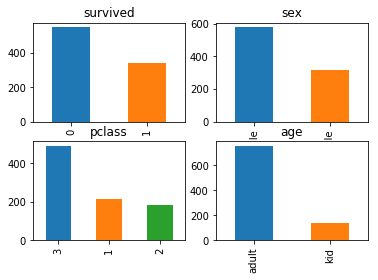

In [146]:
plt.subplot(2,2,1)
data['Survived'].value_counts().plot(kind='bar',title='survived')
plt.subplot(2,2,2)
data['Sex'].value_counts().plot(kind='bar',title='sex')
plt.subplot(2,2,3)
data['Pclass'].value_counts().plot(kind='bar',title='pclass')
plt.subplot(2,2,4)
data['age_b'].value_counts().plot(kind='bar',title='age')

In [148]:
##生存与性别列联表
data.pivot_table(values='PassengerId',index='Survived',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [149]:
##生存与是否成年列联表
data.pivot_table(values='PassengerId',index='Survived',columns='age_b',aggfunc='count')

age_b,kid,adult
Survived,,
0,69,480
1,70,272


In [150]:
##生存与船舱等级列联表
data.pivot_table(values='PassengerId',index='Survived',columns='Pclass',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


# 3决策树(考虑age,sex)准确率=78%

In [228]:
##生成只包含sex,age,survived的数据框
x=data[['Sex','Age']]
y=data['Survived']
##将sex变为0-1变量
x.loc[x['Sex']=='male','Sex']=0
x.loc[x['Sex']=='female','Sex']=1
##划分训练集测试集，测试集比率为25%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
##建立决策树模型,模型在测试集上的预测准确率达到78%
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
print('预测准确率:',dec.score(x_test,y_test))
##同时返回模型对测试集的预测结果
dec.predict(x_test)

预测准确率: 0.7847533632286996


array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1])

# 3.1证明sex变量的重要性

In [173]:
##思路：利用单个sex变量训练模型，再对全是男性与全是女性的乘客进行预测
#生成全是男性与全是女性的数据框，观测数=100
x_test_male=pd.DataFrame({'Sex':[0]*100})
x_test_female=pd.DataFrame({'Sex':[1]*100})
#单独拿出sex变量列建立一个简单的决策树，再用此树预测全是女性乘客的存活率为100%
x_sex=pd.DataFrame(x['Sex'])
dec1=DecisionTreeClassifier()
dec1.fit(x_sex,y)
dec1.predict(x_test_female)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#  3.2证明age变量的重要性

In [210]:
##思路：利用age训练模型，再对全是儿童与全是成人的乘客进行预测
#生成新的列age_bb，成年记为1，儿童记为0
age_bb=preprocessing.Binarizer(threshold=18).transform(np.array(x['Age']).reshape(-1,1)).ravel()
#生成全是成人以及全是儿童的数据框，观测数=100
x_test_kid=pd.DataFrame({'age_b':['0']*100})
x_test_adult=pd.DataFrame({'age_b':['1']*100})
##单独用age_bb建立一个简单决策树，再用此树预测全是儿童的乘客存活率为100%
x_age=pd.DataFrame(age_bb)
dec2=DecisionTreeClassifier()
dec2.fit(x_age,y)
dec2.predict(x_test_kid)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

以上可以证明：women and children(18岁以下) first
也就是说女性与儿童乘客存活率更高

# 4决策树(考虑sex,pclass,fare)准确率=83%

In [230]:
##数据预处理，将fare变量处理成数值型数据
#对于fare_b列，1代表10美元一下，2代表10-20，3代表20-30，4代表30美元以上
data['fare_b']=pd.cut(data.Fare,[min(data.Fare)-1,10,20,30,max(data.Fare)+1],labels=[1,2,3,4])
fare_bb=[]
for i in data['fare_b']:
    j=int(i)
    fare_bb.append(j)
data['fare_b']=fare_bb

In [231]:
##考虑变量sex,pclass,fare变量建树，预测准确率达到83%，高于只考虑sex与age，说明pclass与fare变量对生存率有影响
x1=data[['Sex','Pclass','fare_b']]
##训练集测试集，测试集比例为25%
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=123)
dec3=DecisionTreeClassifier()
dec3.fit(x1_train,y_train)
print('预测准确率:',dec3.score(x1_test,y_test))
#返回预测结果
dec3.predict(x1_test)

预测准确率: 0.8340807174887892


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0])

# 5.单棵决策树（预测准确率为 83%）

In [272]:
##生成包含'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'变量列的数据框
data1=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
#将Embarked变量列转换为数值型变量
data1.loc[data1['Embarked']=='S','Embarked']=1
data1.loc[data1['Embarked']=='C','Embarked']=2
data1.loc[data1['Embarked']=='Q','Embarked']=3
data1_train,data1_test,y_train,y_test=train_test_split(data1,y,test_size=0.25,random_state=123)
#经过模型预剪枝以及后剪枝处理得到最优高度=6
dt=DecisionTreeClassifier(max_depth=6,random_state=12)
dt.fit(data1_train,y_train)
print('预测准确率:',dt.score(data1_test,y_test))

预测准确率: 0.8340807174887892


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# 6.Bagging（预测准确率为79%）

In [274]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(random_state=12)
bag.fit(data1_train,y_train)
print('预测准确率:',bag.score(data1_test,y_test))

预测准确率: 0.7892376681614349


# 7.AdaBoost（预测准确率为82%）

In [275]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=12)
ada.fit(data1_train,y_train)
print('预测准确率:',ada.score(data1_test,y_test))

预测准确率: 0.8161434977578476


# 8.随机森林（预测准确率为84%）

In [276]:
from sklearn.ensemble import RandomForestClassifier
##采用最大树深度为6
rf=RandomForestClassifier(n_estimators=100,max_depth=6,random_state=12)
rf.fit(data1_train,y_train)
print('预测准确率:',rf.score(data1_test,y_test))

预测准确率: 0.8385650224215246


# GBDT（预测准确率为83%）

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
##采用最大树深度为6
gbdt=GradientBoostingClassifier(random_state=12,max_depth=6)
gbdt.fit(data1_train,y_train)
print('预测准确率:',gbdt.score(data1_test,y_test))

预测准确率: 0.8295964125560538
